### Modelling using classification algorithmns

### Logistic Regression Modelling

In [110]:
#some checking of drivingStyle Target values prior to modelling  

df_no_nan['drivingStyle'].value_counts()

drivingStyle
1    13403
0     1659
Name: count, dtype: int64

<AxesSubplot:xlabel='drivingStyle', ylabel='count'>

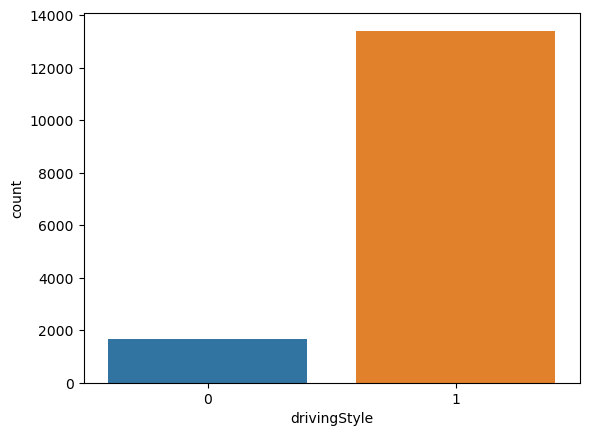

In [111]:
#some checking of drivingStyle Target values can be removed from final model code

sns.countplot(data=df_no_nan, x='drivingStyle')

The dataset y values are imbalanced. However, we will continue to see what effect the dataset can have on modelling with such an imbalance

In [112]:
from sklearn.linear_model import LogisticRegression

In [113]:
log_model = LogisticRegression()

In [114]:
log_model.fit(X_train_scaled,y_train)

LogisticRegression()

In [115]:
log_model.coef_

array([[ 0.43407812,  2.75108969,  0.88407051, -1.80032701,  0.08407692,
         0.11519224,  0.59948883,  0.22393815, -2.7071644 , -0.38242298,
         0.34573322,  0.69859552,  2.06561733, -0.46624618]])

In [116]:
np.round(X_train_scaled.describe(), 1)

,AltitudeVariation,VehicleSpeedInstantaneous,VehicleSpeedAverage,VehicleSpeedVariance,VehicleSpeedVariation,LongitudinalAcceleration,EngineLoad,EngineCoolantTemperature,ManifoldAbsolutePressure,IntakeAirTemperature,VerticalAcceleration,FuelConsumptionAverage,Car,Journey
count,10543.0,10543.0,10543.0,10543.0,10543.0,10543.0,10543.0,10543.0,10543.0,10543.0,10543.0,10543.0,10543.0,10543.0
mean,0.5,0.3,0.3,0.3,0.5,0.5,0.3,0.7,0.4,0.3,0.5,0.4,0.6,0.5
std,0.2,0.2,0.2,0.2,0.2,0.2,0.2,0.3,0.2,0.2,0.2,0.2,0.5,0.4
min,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
25%,0.4,0.0,0.1,0.1,0.4,0.3,0.2,0.5,0.2,0.2,0.4,0.2,0.0,0.0
50%,0.5,0.2,0.2,0.2,0.5,0.5,0.3,0.8,0.3,0.3,0.5,0.4,1.0,0.7
75%,0.6,0.4,0.4,0.4,0.6,0.6,0.4,0.9,0.4,0.5,0.6,0.5,1.0,0.7
max,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0


In [117]:
y_pred = log_model.predict(X_test_scaled)

In [118]:
y_pred

array([1, 1, 1, ..., 1, 1, 1], dtype=int8)

In [119]:
y_pred = log_model.predict_proba(X_test_scaled)

In [120]:
y_pred

array([[0.03455122, 0.96544878],
       [0.01301112, 0.98698888],
       [0.02451193, 0.97548807],
       ...,
       [0.00808315, 0.99191685],
       [0.15807091, 0.84192909],
       [0.1565756 , 0.8434244 ]])

In [121]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [122]:
#checking accuracy

y_pred = log_model.predict(X_test_scaled)

In [123]:
y_pred

array([1, 1, 1, ..., 1, 1, 1], dtype=int8)

In [124]:
accuracy_score(y_test, y_pred)

0.8928966585527771

So the model is 89% accurate on the Y value. 89% prediction accuracy for  value 1

In [125]:
#confusion matrix

from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score

# Calculate a confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)

# Calculate precision
precision = precision_score(y_test, y_pred)

# Calculate recall
recall = recall_score(y_test, y_pred)

# Calculate F1 score
f1 = f1_score(y_test, y_pred)


In [126]:
#display the confusion matrix values

cm

array([[  12,  463],
       [  21, 4023]], dtype=int64)

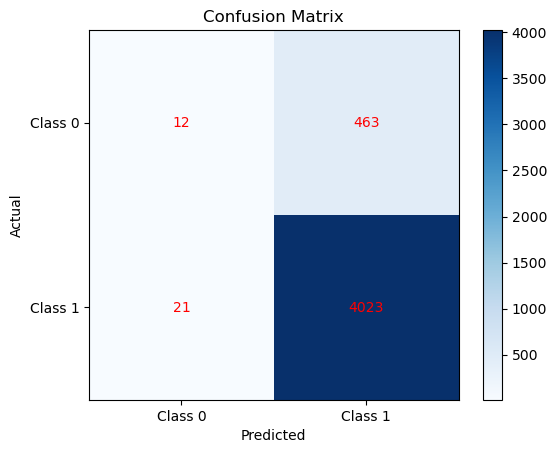

In [127]:
#visualise the confusion matrix

import matplotlib.pyplot as plt

# Calculate a confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
plt.colorbar()
plt.title('Confusion Matrix')
plt.xticks([0, 1], ['Class 0', 'Class 1'])
plt.yticks([0, 1], ['Class 0', 'Class 1'])
plt.xlabel('Predicted')
plt.ylabel('Actual')

# Display the values in the cells
for i in range(2):
    for j in range(2):
        plt.text(j, i, str(cm[i, j]), ha='center', va='center', color='red')

plt.show()


In [128]:
#check how many values were tested
len(y_test)

4519

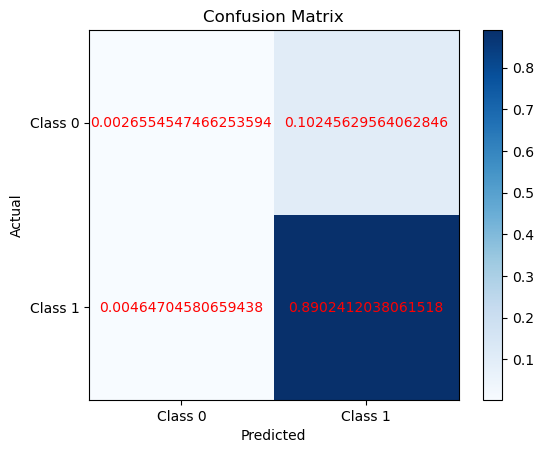

In [126]:
#confusion matrix using normalise function

# Calculate a confusion matrix
cm = confusion_matrix(y_test, y_pred, normalize='all')

# Plot the confusion matrix
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
plt.colorbar()
plt.title('Confusion Matrix')
plt.xticks([0, 1], ['Class 0', 'Class 1'])
plt.yticks([0, 1], ['Class 0', 'Class 1'])
plt.xlabel('Predicted')
plt.ylabel('Actual')

# Display the values in the cells
for i in range(2):
    for j in range(2):
        plt.text(j, i, str(cm[i, j]), ha='center', va='center', color='red')

plt.show()

No improvement in colour levels. Therefore the model is not adequate for prediction

In [129]:
#carry out the classification report

print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.36      0.03      0.05       475
           1       0.90      0.99      0.94      4044

    accuracy                           0.89      4519
   macro avg       0.63      0.51      0.50      4519
weighted avg       0.84      0.89      0.85      4519



Confirms there is an imbalance as '0' value precision and recall do not sync and the support values are significantly different

In [130]:
#specific precision and recall scores

from sklearn.metrics import precision_score, recall_score

In [131]:
precision_score(y_test,y_pred)

0.8967900133749442

In [132]:
recall_score(y_test,y_pred)

0.994807121661721

**A high precision but significant imbalance**

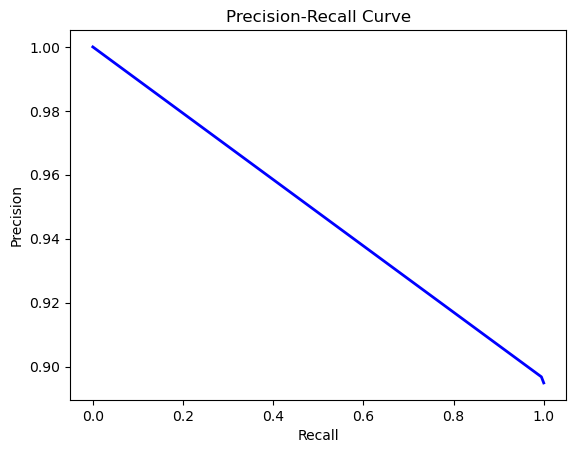

In [133]:
#plot precision recall curve

from sklearn.metrics import precision_recall_curve
import matplotlib.pyplot as plt

precision, recall, _ = precision_recall_curve(y_test,y_pred)

plt.figure()
plt.plot(recall, precision, color='b', lw=2)
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.show()


The above inverted linear "curve" indicates the logistical regression model is not able to effectively determine between the target values and confirms the imbalance in the dataset

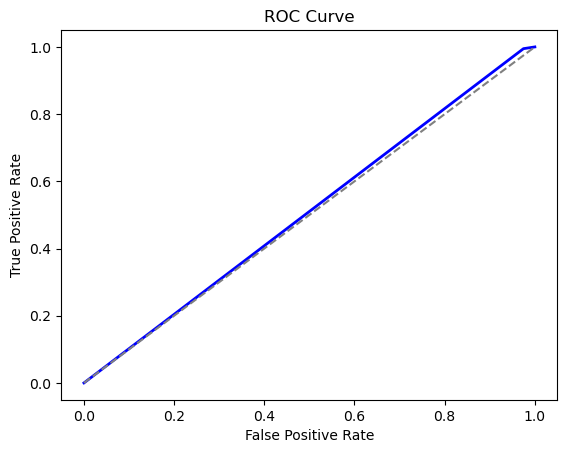

In [132]:
#plot ROC curve

from sklearn.metrics import roc_curve
import matplotlib.pyplot as plt

fpr, tpr, _ = roc_curve(y_test,y_pred)

plt.figure()
plt.plot(fpr, tpr, color='b', lw=2)
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.show()


The above linear "curve" confirms that the model performance is no better than random guessing and does not provide enough useful information for classification.

In [134]:
#check the probabilites for features

log_model.predict_proba(X_test_scaled)[0]

array([0.03455122, 0.96544878])

In [135]:
#validate if the logistical regression prediction value equals the actual data point value

y_test[0]

1

 **Overall, the model predicts a 96% probability for target class 1 and a 3% probability for the target class 0. There is a significant imbalance in the dataset, and therefore this logistical regression model using it present parameters, is not a reliable classifier.**
